#iris

In [21]:
# 從 sklearn 載入鳶尾花資料集套件 
from sklearn.datasets import load_iris

# 載入我們會用到的模型，K-means模型
from sklearn.cluster import KMeans

# 載入用來做資料視覺化的畫圖套件
import matplotlib.pyplot as plt

# 載入 3D 繪圖工具
from mpl_toolkits.mplot3d import Axes3D

In [22]:
# 載入資料集，放到 iris變數內
iris = load_iris()

# 觀察有哪些 key 在資料集內
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [23]:
# 觀察資料筆數
print("資料筆數:")
print(iris.data.shape, "\n")

# 觀察我們資料的欄位名稱
print("資料的欄位名稱，分別是:")
print(iris.feature_names, "\n")

# 觀察我們第一筆的資料內容
print("第一筆的資料內容:")
print(iris.data[0], "\n")

# 觀察我們第一筆的預測目標
print("第一筆的預測目標:")
print(iris.target[0], "\n")

資料筆數:
(150, 4) 

資料的欄位名稱，分別是:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

第一筆的資料內容:
[5.1 3.5 1.4 0.2] 

第一筆的預測目標:
0 



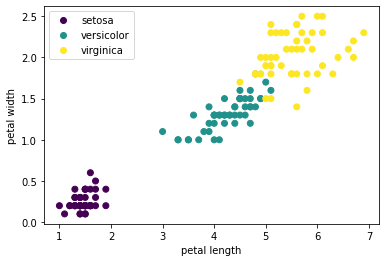

In [25]:
# 繪製散點圖，利用花瓣長度及花瓣寬度作圖，不同的顏色代表不同種的鳶尾花
scatter = plt.scatter(iris.data[:,2], iris.data[:,3], c=iris.target)

# 我們可以在 x,y 軸設定標題名稱
plt.xlabel('petal length')
plt.ylabel('petal width')

plt.legend( handles= scatter.legend_elements()[0], labels= iris.target_names.tolist())

In [26]:
# 載入 K-means 模型，設定將資料分成三群
estimator = KMeans(n_clusters=3, random_state=54)

# 進行模型訓練，因為K-means是非監督式學習，故不用放入label的標籤資料
estimator.fit(iris.data)

KMeans(n_clusters=3, random_state=54)

In [27]:
# 印出分群好的標籤來觀察
print(estimator.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [28]:
# 印出K-means 分群好的中心點
estimator.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

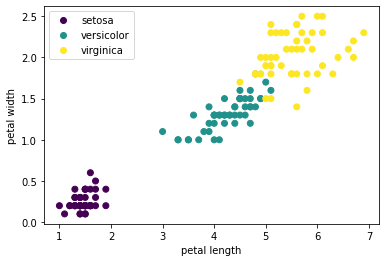

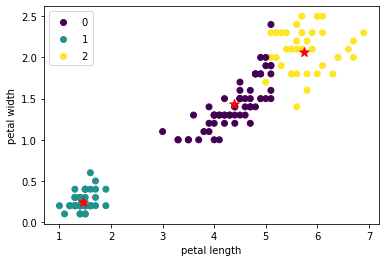

In [29]:
# 這張圖用原始的label來作圖
scatter = plt.scatter(iris.data[:,2], iris.data[:,3], c=iris.target)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend( handles= scatter.legend_elements()[0], labels= iris.target_names.tolist())
plt.show()

# 這張圖用KMeans分群好的label來作圖
scatter = plt.scatter(iris.data[:,2], iris.data[:,3], c=estimator.labels_)
plt.xlabel('petal length')
plt.ylabel('petal width')

# 我們可以把 K-means 找到的中心位置給畫出來, 我們畫成星號、配置紅色、s為size的縮寫, 及設置大小
plt.scatter(estimator.cluster_centers_[:,2], estimator.cluster_centers_[:,3], marker='*', c='red', s=100)
plt.legend(*scatter.legend_elements())
plt.show()

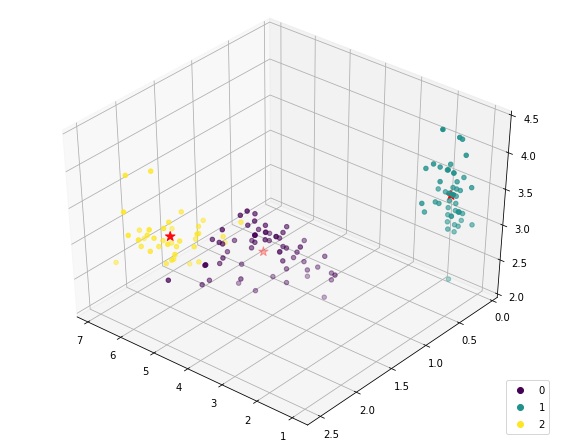

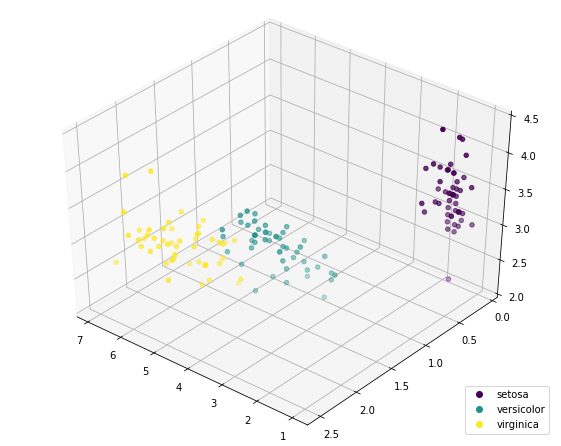

In [30]:
# 這邊的 3D繪圖屬於較高階的作法，如果想要得到更詳細的資料可以到官網查詢:
# https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#scatter-plots

# 接下來三行是繪圖環境的設置
# elev 是從不同的高度視角看過去
# azim 是從不同的水平角度看過去
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=40, azim=130)
ax.set_zlim(2, 4.5)

# 以下是繪圖資訊，這次的繪圖有兩個部分
# 1.) 先將鳶尾花的資料匯出:  iris.data[:, 2], iris.data[:, 3], iris.data[:, 1]，這邊有三個特徵被我們拿出來做三個維度的座標
# 2.) c 參數是顏色變數，我們說我們的剛剛畫上空間的每一顆資料的顏色會根據 label 而決定，
#     而 label 是根據 estimator 也就是 kmeans訓練過的模型結果
ax.scatter(iris.data[:, 2], iris.data[:, 3], iris.data[:, 1], c=estimator.labels_)
ax.scatter(estimator.cluster_centers_[:,2], estimator.cluster_centers_[:,3], estimator.cluster_centers_[:,1], marker='*', c='red', s=100)

plt.legend( *scatter.legend_elements(), loc='lower right')
plt.show()

# 同時我們也可以印出原始的label資料來做比較
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=40, azim=130)
ax.set_zlim(2, 4.5)

# 記得這邊的 c 要改回原始的target
ax.scatter(iris.data[:, 2], iris.data[:, 3], iris.data[:, 1], c=iris.target)

plt.legend( handles= scatter.legend_elements()[0], labels= iris.target_names.tolist(), loc='lower right')
plt.show()

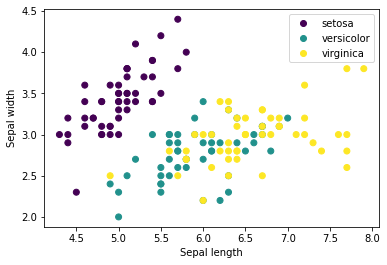

In [32]:
# 繪製散點圖，利用花萼長度及花萼寬度作圖，不同的顏色代表不同種的鳶尾花
scatter = plt.scatter(iris.data[:,0], iris.data[:,1], c=iris.target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.legend( handles= scatter.legend_elements()[0], labels= iris.target_names.tolist())

In [33]:
# 載入 K-means 模型，設定將資料分成三群
estimator = KMeans(n_clusters=3, random_state=54)

# 進行模型訓練，因為K-means是非監督式學習，故不用放入label的標籤資料
estimator.fit(iris.data)
print(estimator.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [34]:
estimator.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

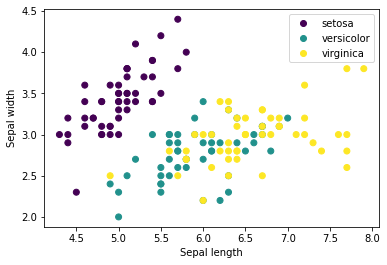

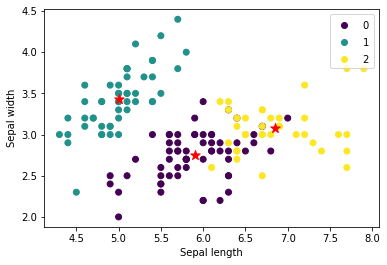

In [35]:
# 這張圖用原始的label來作圖
scatter = plt.scatter(iris.data[:,0], iris.data[:,1], c=iris.target)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend( handles= scatter.legend_elements()[0], labels= iris.target_names.tolist())
plt.show()

# 這張圖用KMeans分群好的label來作圖
scatter = plt.scatter(iris.data[:,0], iris.data[:,1], c=estimator.labels_)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# 我們可以把 K-means 找到的中心位置給畫出來, 我們畫成星號、配置紅色、s為size的縮寫, 及設置大小
plt.scatter(estimator.cluster_centers_[:,0], estimator.cluster_centers_[:,1], marker='*', c='red', s=100)
plt.legend(*scatter.legend_elements())
plt.show()

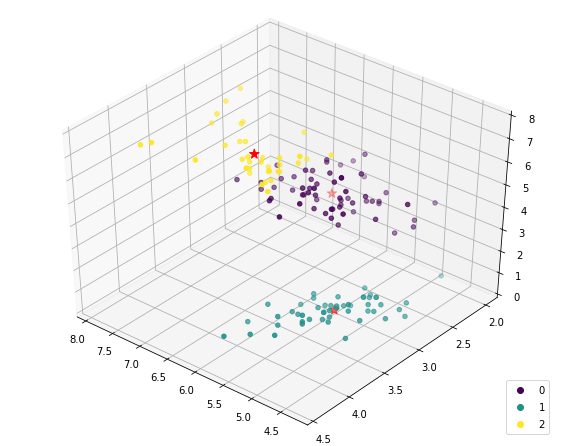

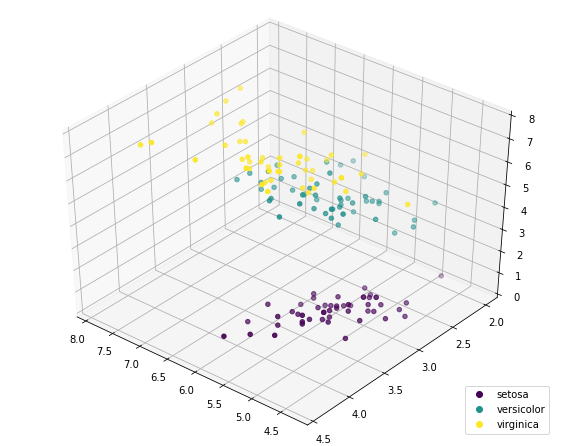

In [36]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=40, azim=130)
ax.set_zlim(0,8)

ax.scatter(iris.data[:, 0], iris.data[:, 1], iris.data[:, 2], c=estimator.labels_)
ax.scatter(estimator.cluster_centers_[:,0], estimator.cluster_centers_[:,1], estimator.cluster_centers_[:,2], marker='*', c='red', s=100)

plt.legend( *scatter.legend_elements(), loc='lower right')
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=40, azim=130)
ax.set_zlim(0, 8)

ax.scatter(iris.data[:, 0], iris.data[:, 1], iris.data[:, 2], c=iris.target)

plt.legend( handles= scatter.legend_elements()[0], labels= iris.target_names.tolist(), loc='lower right')
plt.show()

#digits

In [50]:
# 從 sklearn 載入手寫辨識資料集
from sklearn.datasets import load_digits

# 載入我們會用到的模型，K-Means分群模型
from sklearn.cluster import KMeans

# 載入用來做資料視覺化的畫圖套件
import matplotlib.pyplot as plt

# 載入做數學運算的套件 Numpy
import numpy as np

In [63]:
# 載入手寫字資料庫到digits變數中
digits = load_digits()

# 觀察有哪些 key 在資料集內
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [64]:
# 觀察資料筆數
print("資料筆數:")
print(digits.data.shape, "\n")

# 觀察我們資料的欄位名稱
print("資料的欄位名稱，分別是:")
print(digits.target_names, "\n")

# 觀察我們第一筆的資料內容
print("第一筆的資料內容:")
print(digits.data[0], "\n")

# 觀察我們第一筆的影像內容
print("第一筆的影像內容:")
print(digits.images[0], "\n")

# 觀察我們第一筆的預測目標
print("第一筆的預測目標:")
print(digits.target[0], "\n")

資料筆數:
(1797, 64) 

資料的欄位名稱，分別是:
[0 1 2 3 4 5 6 7 8 9] 

第一筆的資料內容:
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.] 

第一筆的影像內容:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]] 

第一筆的預測目標:
0 



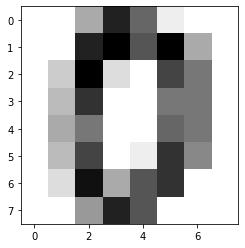

In [65]:
# 試試看用資料視覺畫的套件來畫出 image 影像資料
# cmap 是指取用哪種顏色顯示, plt.cm.binary 是顯示灰階的顏色庫
plt.imshow(digits.images[0] , cmap=plt.cm.binary)

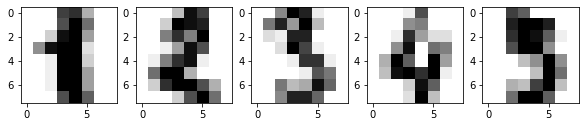

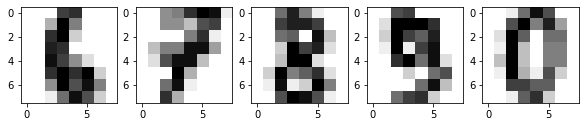

In [66]:
# 一次看前十筆的影像資料

# 先畫第一列
# figsize 代表畫布的大小, 這裡是希望設定成長=10, 寬=10, 單位是英寸
plt.figure(figsize=(10,10))

for i in range(1,6):
  plt.subplot(1,5,i)
  plt.imshow(digits.images[i], cmap=plt.cm.binary)
plt.show()

# 再畫第二列
plt.figure(figsize=(10,10))

for i in range(6,11):
  plt.subplot(2,5,i)
  plt.imshow(digits.images[i], cmap=plt.cm.binary)
plt.show()

In [67]:
# 載入 K-means 模型，設定將資料分成十群
estimator = KMeans(n_clusters=10, random_state=18)

# 進行模型訓練，因為K-means是非監督式學習，故不用放入label的標籤資料
estimator.fit(digits.data)

KMeans(n_clusters=10, random_state=18)

In [69]:
# 這邊分別取出 K-means模型幫我們分好的其中三群出來看
# 分別就是 label為0,1,2的三群，並把他們的位置(index)存到變數 c_0, c_1, c_2內
c_0 = np.where(estimator.labels_== 0 )[0]
c_1 = np.where(estimator.labels_== 1 )[0]
c_2 = np.where(estimator.labels_== 2 )[0]

# 印出這三個變數的前十筆資料來看
# 他們代表著不同群集裡，分別在 digits 裡面的排序位置
print(c_0[0:10])
print(c_1[0:10])
print(c_2[0:10])

[ 3 13 23 45 59 60 62 63 83 89]
[ 0 10 20 30 36 48 49 55 72 78]
[ 1  2 18 28 38 40 50 51 53 57]


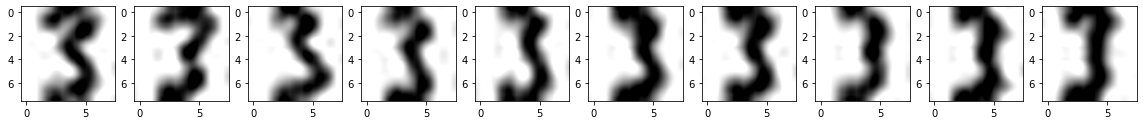

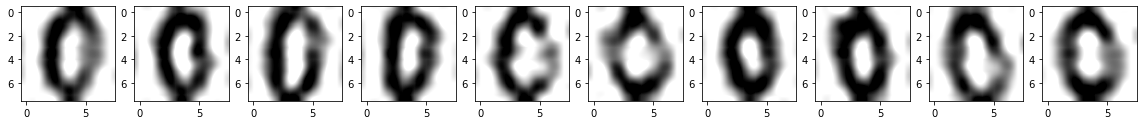

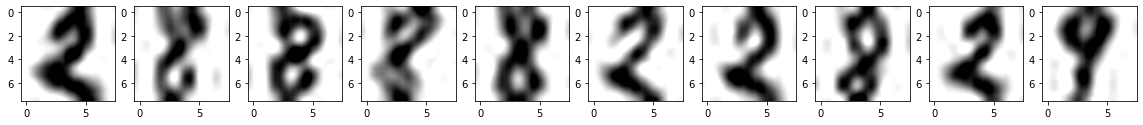

In [70]:
# 把這三個集群分成三列顯示出來看看
# 這下面有一個方法 interpolation='sinc'，他會讓影像用sin波取內插取值，讓影像更清晰

# 先畫第一列
plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(1,10,i)
  plt.imshow(digits.images[c_0[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()

# 再畫第二列
plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(2,10,i)
  plt.imshow(digits.images[c_1[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()

# 再畫第三列
plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(3,10,i)
  plt.imshow(digits.images[c_2[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()

In [84]:
estimator = KMeans(n_clusters=10, random_state=18)
estimator.fit(digits.data)

c_0 = np.where(estimator.labels_== 0 )[0]
c_1 = np.where(estimator.labels_== 1 )[0]
c_2 = np.where(estimator.labels_== 2 )[0]
c_3 = np.where(estimator.labels_== 3 )[0]
c_4 = np.where(estimator.labels_== 4 )[0]
c_5 = np.where(estimator.labels_== 5 )[0]
c_6 = np.where(estimator.labels_== 6 )[0]
c_7 = np.where(estimator.labels_== 7 )[0]
c_8 = np.where(estimator.labels_== 8 )[0]
c_9 = np.where(estimator.labels_== 9 )[0]

print(c_0[0:10])
print(c_1[0:10])
print(c_2[0:10])
print(c_3[0:10])
print(c_4[0:10])
print(c_5[0:10])
print(c_6[0:10])
print(c_7[0:10])
print(c_8[0:10])
print(c_9[0:10])

[ 3 13 23 45 59 60 62 63 83 89]
[ 0 10 20 30 36 48 49 55 72 78]
[ 1  2 18 28 38 40 50 51 53 57]
[11 21 27 42 47 56 70 75 77 80]
[  5   8   9  19  29  31  37  39  73 105]
[ 15  25  32  33  35  46  71  74 102 109]
[ 12  22  84 113 132 142 152 180 181 184]
[ 6 16 26 34 58 65 66 67 82 88]
[  4  14  24  41  64  68  87  97 100 110]
[ 7 17 43 44 52 54 61 81 86 94]


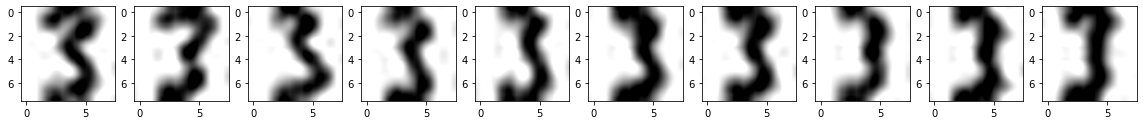

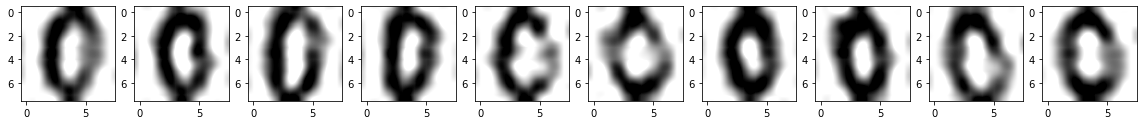

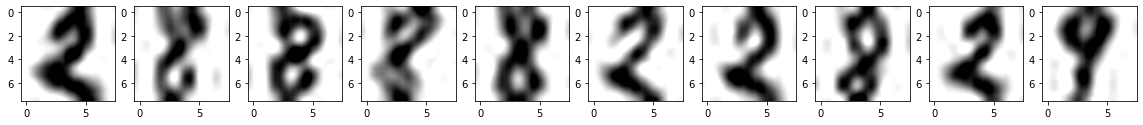

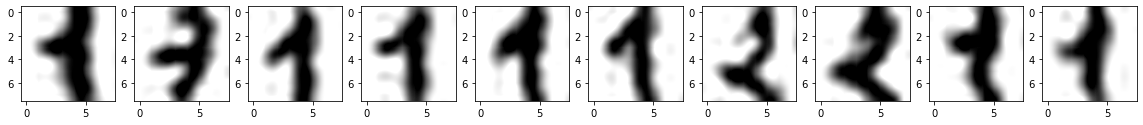

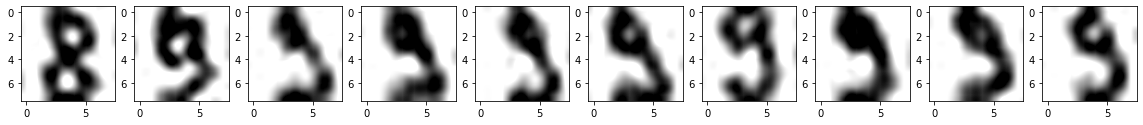

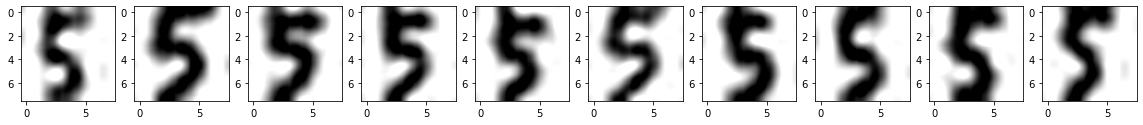

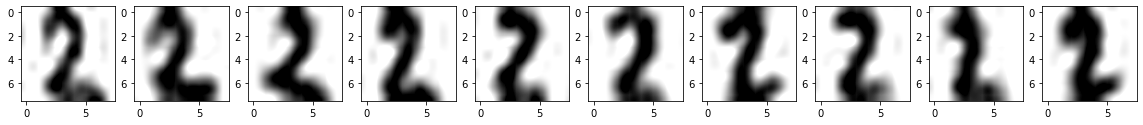

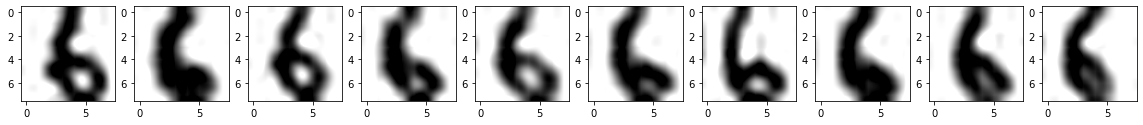

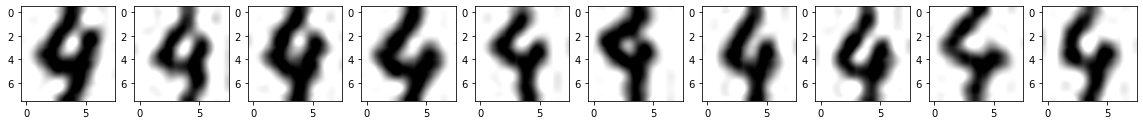

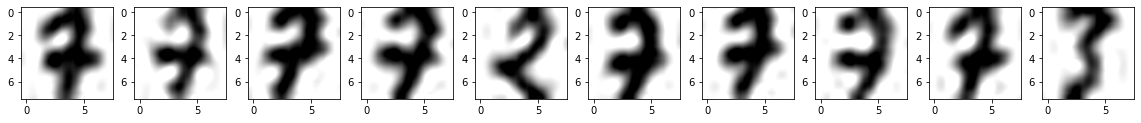

In [88]:
# 先畫第一列
plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(1,10,i)
  plt.imshow(digits.images[c_0[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()

# 再畫第二列
plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(2,10,i)
  plt.imshow(digits.images[c_1[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()

# 再畫第三列
plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(3,10,i)
  plt.imshow(digits.images[c_2[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()

plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(4,10,i)
  plt.imshow(digits.images[c_3[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()

plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(5,10,i)
  plt.imshow(digits.images[c_4[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()

plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(6,10,i)
  plt.imshow(digits.images[c_5[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()

plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(7,10,i)
  plt.imshow(digits.images[c_6[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()

plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(8,10,i)
  plt.imshow(digits.images[c_7[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()

plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(9,10,i)
  plt.imshow(digits.images[c_8[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()

plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(10,10,i)
  plt.imshow(digits.images[c_9[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()

In [58]:
estimator = KMeans(n_clusters=3, random_state=18)

# 進行模型訓練，因為K-means是非監督式學習，故不用放入label的標籤資料
estimator.fit(digits.data)

KMeans(n_clusters=3, random_state=18)

In [59]:
c_0 = np.where(estimator.labels_== 0 )[0]
c_1 = np.where(estimator.labels_== 1 )[0]
c_2 = np.where(estimator.labels_== 2 )[0]

print(c_0[0:10])
print(c_1[0:10])
print(c_2[0:10])

[ 0  4  6 10 14 16 20 24 26 30]
[ 3  5  8  9 12 13 19 22 23 29]
[ 1  2  7 11 15 17 18 21 25 27]


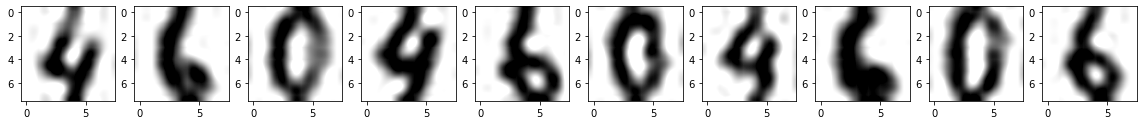

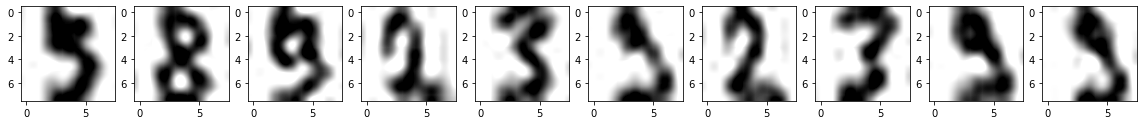

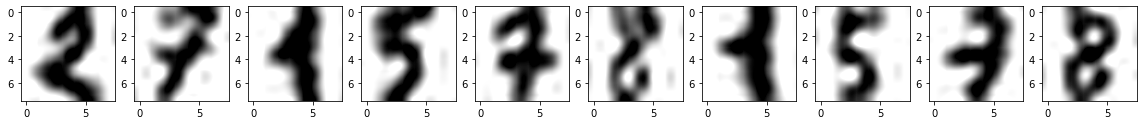

In [62]:
# 先畫第一列
plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(1,10,i)
  plt.imshow(digits.images[c_0[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()

# 再畫第二列
plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(2,10,i)
  plt.imshow(digits.images[c_1[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()

# 再畫第三列
plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(3,10,i)
  plt.imshow(digits.images[c_2[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()